# Autoencoders over time

## Setup

Import the necessary libraries.

In [264]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Load datasets

### UD1

This dataset, which is published by Yahoo [94], is a univariate time-series dataset containing the traffic to Yahoo
services. The anomalies are labeled by humans. This dataset consists of 67 different time-series each containing about
1420 timestamps. The timestamps have been observed hourly. Most of the time-series are stationary and on average
each time-series consists of 1420 timestamps where 1.9% are anomalies.

The dataset is divided into training and test sets where 20 time series (30%) are used for training and 47 time series(70%) as test set.

### UD2

Yahoo made another dataset [94] available which consists of 100 synthetic univariate time-series data containing
anomalies. Each time-series contains about 1421 timestamps. The anomalies have been inserted randomly therefore
representing point anomalies. On average, each time-series consists of 0.3% anomalies.

### UD3

This dataset also consists of 100 synthetic univariate time-series [94], each containing about 1680 timestamps. In
contrast to the former one, this dataset also contains seasonality. The anomalies are inserted at random points marking
the changing points. On average, the anomalous rate of each time-series is about 0.3%.

### UD4

The dataset also contains 100 synthetic univariate time-series. Each time-series has about 1680 timestamps. The
difference to the former one is the fact that this dataset also contains changepoint anomalies where the mean of the time-series changes. For our evaluation, we focus on the main anomalous points and ignore distinguishing between
anomalous types. On average, 0.5% of the dataset is anomalous.

The values of timestamps in UD3 and UD4 are the summation of the noise, trend, and 3 types of seasonality (half-day, daily, and weekly).  
UD2, UD3, and UD4 are divided into training and test sets where 30 time series (30%) are used for training and 70-time series (70%) as test set.

### Training set

In this section, we will retrieve data from CSV files, then remove anomalies to train our model with only normal points. In addition, we standardize the dataset, then we reshape our dataset in a way that the number of columns equals the window length (w = 32).

In [265]:
from sklearn.preprocessing import StandardScaler
Data_names = np.array(["UD1","UD2","UD3","UD4"])

for Data_name in Data_names:
    if Data_name == "UD1":
        i_Tr = 20
        i_Test = 47
        Folder = "A1Benchmark/real_"
        Col_Anomaly = "is_anomaly"
        UD1=[]
        UD1_Noise= []
        IndicesUD1= []
        IndicesUD1_Noise= []
        UD1_Test=[]
        IndicesUD1_Test= []
    else:
        i_Tr = 30
        i_Test = 70
        if Data_name == "UD2":
            Folder = "A2Benchmark/synthetic_"
            Col_Anomaly ="is_anomaly"
            UD2= []
            UD2_Noise= []
            IndicesUD2= []
            IndicesUD2_Noise= []
            UD2_Test=[]
            IndicesUD2_Test= []
        elif  Data_name == "UD3":
            Folder = "A3Benchmark/A3Benchmark-TS"
            Col_Anomaly = "anomaly"
            UD3= []
            UD3_Noise= []
            IndicesUD3= []
            IndicesUD3_Noise= []
            UD3_Test=[]
            IndicesUD3_Test= []
        elif Data_name == "UD4":
            Folder = "A4Benchmark/A4Benchmark-TS"
            Col_Anomaly = "anomaly"
            UD4= []
            UD4_Noise= []
            IndicesUD4= []
            IndicesUD4_Noise= []
            UD4_Test=[]
            IndicesUD4_Test= []
    
    Xs = []
    Xs_Noise = []
    IndicesS = [0]
    IndicesS_Noise=[0]

    for i in range(1, i_Tr+1):
        str=("datasets/"+Folder+"%d"+".csv") % i
        print(str)
        time_serie= pd.read_csv(str,index_col=0)

        ## Remove anomalies
        time_serie_wn = time_serie.loc[time_serie[Col_Anomaly] == 0]
        time_serie_noise = time_serie
        time_serie_wn = time_serie_wn["value"]
        time_serie_noise = time_serie_noise["value"]

        ## Standardize the data
        scaler = StandardScaler()
        
        ## without noise
        time_serie_wn_stand = scaler.fit_transform(time_serie_wn.values.reshape(-1,1))

        ## with noise
        time_serie_stand = scaler.fit_transform(time_serie_noise.values.reshape(-1,1))

        ## Reshape data
        window_size = 32
        l = len(time_serie_wn_stand) 

        ## without noise
        for c in range(0, (l - window_size +1)):
            Xs.append(time_serie_wn_stand[c:c+window_size])


        ## Save indices of each time_serie    
        IndicesS.append(len(Xs)) 

        ## with noise 
        l_n = len(time_serie_stand) 
        for n in range(0, (l_n - window_size +1)):
            Xs_Noise.append(time_serie_stand[n:n+window_size])

        ## Save indices of each time_serie     
        IndicesS_Noise.append(len(Xs_Noise))    
   
    if Data_name == "UD1":
            UD1= Xs
            UD1_Noise= Xs_Noise
            IndicesUD1= IndicesS
            IndicesUD1_Noise= IndicesS_Noise
    elif Data_name == "UD2":
            UD2= Xs
            UD2_Noise= Xs_Noise
            IndicesUD2= IndicesS
            IndicesUD2_Noise= IndicesS_Noise
    elif Data_name == "UD3":
            UD3= Xs
            UD3_Noise= Xs_Noise
            IndicesUD3= IndicesS
            IndicesUD3_Noise= IndicesS_Noise
    elif Data_name == "UD4":
            UD4= Xs
            UD4_Noise= Xs_Noise
            IndicesUD4= IndicesS
            IndicesUD4_Noise= IndicesS_Noise

datasets/A1Benchmark/real_1.csv
datasets/A1Benchmark/real_2.csv
datasets/A1Benchmark/real_3.csv
datasets/A1Benchmark/real_4.csv
datasets/A1Benchmark/real_5.csv
datasets/A1Benchmark/real_6.csv
datasets/A1Benchmark/real_7.csv
datasets/A1Benchmark/real_8.csv
datasets/A1Benchmark/real_9.csv
datasets/A1Benchmark/real_10.csv
datasets/A1Benchmark/real_11.csv
datasets/A1Benchmark/real_12.csv
datasets/A1Benchmark/real_13.csv
datasets/A1Benchmark/real_14.csv
datasets/A1Benchmark/real_15.csv
datasets/A1Benchmark/real_16.csv
datasets/A1Benchmark/real_17.csv
datasets/A1Benchmark/real_18.csv
datasets/A1Benchmark/real_19.csv
datasets/A1Benchmark/real_20.csv
datasets/A2Benchmark/synthetic_1.csv
datasets/A2Benchmark/synthetic_2.csv
datasets/A2Benchmark/synthetic_3.csv
datasets/A2Benchmark/synthetic_4.csv
datasets/A2Benchmark/synthetic_5.csv
datasets/A2Benchmark/synthetic_6.csv
datasets/A2Benchmark/synthetic_7.csv
datasets/A2Benchmark/synthetic_8.csv
datasets/A2Benchmark/synthetic_9.csv
datasets/A2Bench

In [266]:
print("Indices of time-series of UD1 is :", IndicesUD1)
print("Indices of time-series of UD2 is :", IndicesUD2)
print("Indices of time-series of UD3 is :", IndicesUD3)
print("Indices of time-series of UD4 is :", IndicesUD4)

Indices of time-series of UD1 is : [0, 1387, 2779, 4194, 5581, 6987, 8387, 9718, 11097, 12519, 13914, 15303, 16708, 18104, 19510, 20908, 22335, 23501, 24928, 26094, 27452]
Indices of time-series of UD2 is : [0, 1386, 2767, 4156, 5542, 6923, 8312, 9698, 11079, 12468, 13854, 15235, 16624, 18010, 19391, 20780, 22166, 23547, 24936, 26322, 27703, 29092, 30478, 31859, 33248, 34634, 36015, 37404, 38790, 40171, 41560]
Indices of time-series of UD3 is : [0, 1638, 3271, 4914, 6557, 8204, 9847, 11491, 13136, 14775, 16414, 18056, 19692, 21332, 22966, 24609, 26249, 27897, 29534, 31173, 32810, 34447, 36092, 37726, 39367, 41014, 42652, 44292, 45939, 47584, 49225]
Indices of time-series of UD4 is : [0, 1636, 3280, 4923, 6566, 8209, 9850, 11485, 13121, 14769, 16414, 18058, 19702, 21337, 22975, 24615, 26263, 27902, 29550, 31187, 32823, 34459, 36098, 37743, 39383, 41021, 42668, 44302, 45939, 47574, 49218]


### Test set

We follow the same steps as the previous step. Here, we will use 47-time series for testing the model with UD1 and 70-time series with UD2, UD3 and UD4, where the anomalies are included in the set. Regarding labels, we divide the time series into windows of size 32. If the window contains at least one anomaly, we label that window as an anomaly(1). Otherwise, we label it as normal(0).

In [267]:
for Data_name in Data_names:
    if Data_name == "UD1":
        i_Tr = 20
        i_Test = 47
        Folder = "A1Benchmark/real_"
        Col_Anomaly = "is_anomaly"
    else:
        i_Tr = 30
        i_Test = 70
        
        if Data_name == "UD2":
            Folder = "A2Benchmark/synthetic_"
            Col_Anomaly ="is_anomaly"
            
        elif  Data_name == "UD3":
            Folder = "A3Benchmark/A3Benchmark-TS"
            Col_Anomaly = "anomaly"
        
        elif Data_name == "UD4":
            Folder = "A4Benchmark/A4Benchmark-TS"
            Col_Anomaly = "anomaly"
            
    Xs_Test = []
    Xs_Validation =[]
    IndicesS_Test = [0]
    test_labels = []
    for i in range(i_Tr+1, i_Test+1):
        
        str=("datasets/"+Folder+"%d"+".csv") % i
        time_serie= pd.read_csv(str,index_col=0)
        validation_set = time_serie
        validation_set = validation_set.loc[validation_set[Col_Anomaly] == 0]

        ## Set the labels of timestamps (normal,anomaly)
        data_copy = time_serie
        time_serie_labels = data_copy[Col_Anomaly]
        time_serie_labels = np.array(time_serie_labels)
        time_serie_test = time_serie["value"]
        validation_set = validation_set["value"]

        ## Standardize the data
        scaler = StandardScaler()
        time_serie_test_stand = scaler.fit_transform(time_serie_test.values.reshape(-1,1))

        validation_set= scaler.fit_transform(validation_set.values.reshape(-1,1))

        ## Reshape data
        window_size = 32
        l = len(time_serie_test_stand) 

        for c in range(0, (l - window_size +1)):
            Xs_Test.append(time_serie_test_stand[c:c+window_size])
            test = np.array(time_serie_labels[c:c+window_size])

            # label each window of a time serie
            if 1 in test:
                test_labels.append(1)
            else:
                 test_labels.append(0)


        IndicesS_Test.append(len(Xs_Test)) 
        
        lv = len(validation_set)
        for cc in range(0, (lv - window_size +1)):
            Xs_Validation.append(validation_set[cc:cc+window_size])
        
    if Data_name == "UD1":
            UD1_Test= Xs_Test
            IndicesUD1_Test= IndicesS_Test
            UD1_labels= test_labels
            UD1_V=Xs_Validation
    elif Data_name == "UD2":
            UD2_Test= Xs_Test
            IndicesUD2_Test= IndicesS_Test
            UD2_labels= test_labels
            UD2_V=Xs_Validation
    elif Data_name == "UD3":
            UD3_Test= Xs_Test
            IndicesUD3_Test= IndicesS_Test
            UD3_labels= test_labels
            UD3_V=Xs_Validation
    elif Data_name == "UD4":
            UD4_Test= Xs_Test
            IndicesUD4_Test= IndicesS_Test
            UD4_labels= test_labels
            UD4_V=Xs_Validation

UD1 Test shape is (37931, 32, 1)
UD2 Test shape is (55600, 32, 1)
UD3 Test shape is (65960, 32, 1)
UD4 Test shape is (65960, 32, 1)


In [268]:
print("Indices of time-series of UD1 Test is :", IndicesUD1_Test)
print("Indices of time-series of UD2 Test is :", IndicesUD2_Test)
print("Indices of time-series of UD3 Test is :", IndicesUD3_Test)
print("Indices of time-series of UD4 Test is :", IndicesUD4_Test)

Indices of time-series of UD1 Test is : [0, 1389, 2778, 4167, 5597, 7001, 8405, 9801, 11211, 12621, 14051, 15447, 16843, 18251, 19647, 21043, 22473, 23876, 25272, 26668, 28064, 29468, 30877, 32286, 33716, 35125, 36535, 37931]
Indices of time-series of UD2 Test is : [0, 1390, 2780, 4170, 5560, 6950, 8340, 9730, 11120, 12510, 13900, 15290, 16680, 18070, 19460, 20850, 22240, 23630, 25020, 26410, 27800, 29190, 30580, 31970, 33360, 34750, 36140, 37530, 38920, 40310, 41700, 43090, 44480, 45870, 47260, 48650, 50040, 51430, 52820, 54210, 55600]
Indices of time-series of UD3 Test is : [0, 1649, 3298, 4947, 6596, 8245, 9894, 11543, 13192, 14841, 16490, 18139, 19788, 21437, 23086, 24735, 26384, 28033, 29682, 31331, 32980, 34629, 36278, 37927, 39576, 41225, 42874, 44523, 46172, 47821, 49470, 51119, 52768, 54417, 56066, 57715, 59364, 61013, 62662, 64311, 65960]
Indices of time-series of UD4 Test is : [0, 1649, 3298, 4947, 6596, 8245, 9894, 11543, 13192, 14841, 16490, 18139, 19788, 21437, 23086, 247

## Visualize the data

We will visualize the first time series of each dataset over time with and without anomalies. Each time series is composed of a set of sliding windows of size 32 timestamps and a stride equal to 1. Therefore, the visualized time series will contain redundancy in values. 

### with anomalies

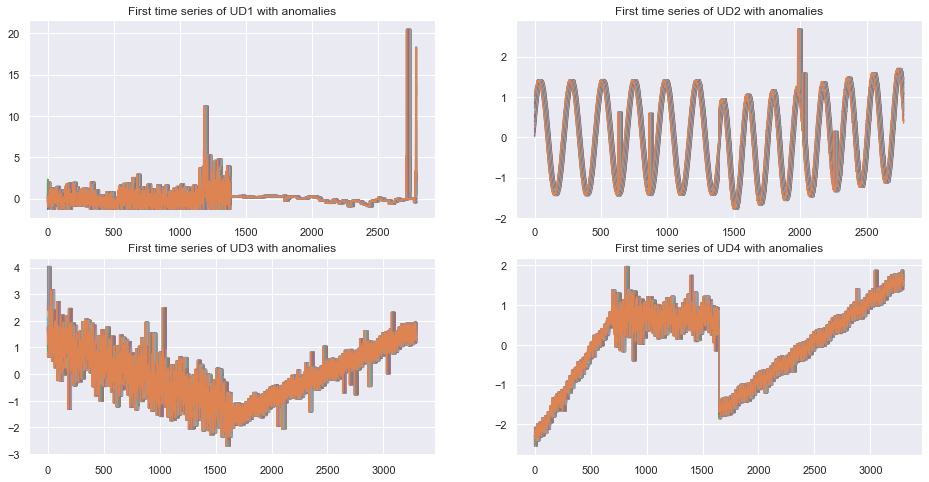

In [269]:
UD1_Noise = np.reshape(UD1_Noise,(-1,32))
UD2_Noise = np.reshape(UD2_Noise,(-1,32))
UD3_Noise = np.reshape(UD3_Noise,(-1,32))
UD4_Noise = np.reshape(UD4_Noise,(-1,32))

figure, axis = plt.subplots(2, 2)
figure.set_figheight(8)
figure.set_figwidth(16)


# For UD1
axis[0, 0].plot(UD1_Noise[1:IndicesUD1_Noise[2]])
axis[0, 0].set_title("First time series of UD1 with anomalies")
  
# For UD2
axis[0, 1].plot(UD2_Noise[1:IndicesUD2_Noise[2]])
axis[0, 1].set_title("First time series of UD2 with anomalies")
  
# For UD3
axis[1, 0].plot(UD3_Noise[1:IndicesUD3_Noise[2]])
axis[1, 0].set_title("First time series of UD3 with anomalies")
  
# For UD4
axis[1, 1].plot(UD4_Noise[1:IndicesUD4_Noise[2]])
axis[1, 1].set_title("First time series of UD4 with anomalies")
  
# Combine all the operations and display
plt.show()


### without anomalies

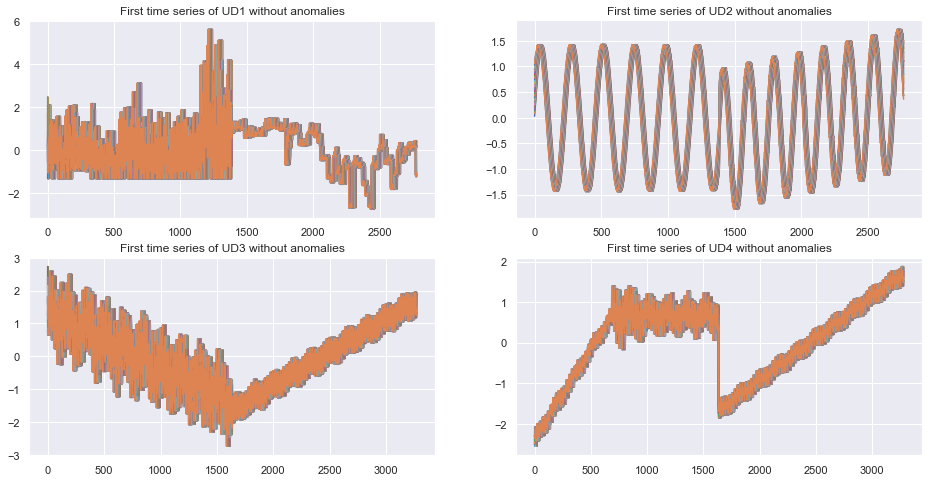

In [270]:
UD1 = np.reshape(UD1,(-1,32))
UD2 = np.reshape(UD2,(-1,32))
UD3 = np.reshape(UD3,(-1,32))
UD4 = np.reshape(UD4,(-1,32))

figure, axis = plt.subplots(2, 2)
figure.set_figheight(8)
figure.set_figwidth(16)


# For UD1
axis[0, 0].plot(UD1[1:IndicesUD1[2]])
axis[0, 0].set_title("First time series of UD1 without anomalies")
  
# For UD2
axis[0, 1].plot(UD2[1:IndicesUD2[2]])
axis[0, 1].set_title("First time series of UD2 without anomalies")
  
# For UD3
axis[1, 0].plot(UD3[1:IndicesUD3[2]])
axis[1, 0].set_title("First time series of UD3 without anomalies")
  
# For UD4
axis[1, 1].plot(UD4[1:IndicesUD4[2]])
axis[1, 1].set_title("First time series of UD4 without anomalies")
  
# Combine all the operations and display
plt.show()

## Build an autoencoder (Dense)

We will create an autoencoder with 2 dense layers for the encoding part and the same for the decoding part. We will use Relu as an activation function for the encoding and decoding layers. Linear will be the activation function for the output layer. The model will take 32 timestamps at once, which is the size of the window. 

As we have 4 different datasets (UD1, UD2, UD3, UD4), we need 4 models with the same architecture but trained with a different set of time series.

In [271]:
from tensorflow.keras.layers import Flatten

modelUD1 = Sequential()
modelUD2 = Sequential()
modelUD3 = Sequential()
modelUD4 = Sequential()

## Encoder part
# Add a Dense layer with 32 neurons, with relu as activation function
dense_layer_1 = Dense(32,activation='relu', name='encoder_1')
dense_layer_2 = Dense(32,activation='relu', name='encoder_1')
dense_layer_3 = Dense(32,activation='relu', name='encoder_1')
dense_layer_4 = Dense(32,activation='relu', name='encoder_1')

modelUD1.add(dense_layer_1)
modelUD2.add(dense_layer_2)
modelUD3.add(dense_layer_3)
modelUD4.add(dense_layer_4)

# Add a Dense layer with 16 neurons, with relu as activation function
dense_layer_1 = Dense(16,activation='relu', name='encoder_2')
dense_layer_2 = Dense(16,activation='relu', name='encoder_2')
dense_layer_3 = Dense(16,activation='relu', name='encoder_2')
dense_layer_4 = Dense(16,activation='relu', name='encoder_2')
modelUD1.add(dense_layer_1)
modelUD2.add(dense_layer_2)
modelUD3.add(dense_layer_3)
modelUD4.add(dense_layer_4)

modelUD1.add(Flatten())
modelUD2.add(Flatten())
modelUD3.add(Flatten())
modelUD4.add(Flatten())

## Decoder part
# Add a Dense layer with 16 neurons, with relu as activation function
dense_layer_1 = Dense(16,activation='relu', name='decoder_1')
dense_layer_2 = Dense(16,activation='relu', name='decoder_1')
dense_layer_3 = Dense(16,activation='relu', name='decoder_1')
dense_layer_4 = Dense(16,activation='relu', name='decoder_1')
modelUD1.add(dense_layer_1)
modelUD2.add(dense_layer_2)
modelUD3.add(dense_layer_3)
modelUD4.add(dense_layer_4)

# Add a Dense layer with 32 neurons, with relu as activation function
dense_layer_1 = Dense(32,activation='relu', name='decoder_2')
dense_layer_2 = Dense(32,activation='relu', name='decoder_2')
dense_layer_3 = Dense(32,activation='relu', name='decoder_2')
dense_layer_4 = Dense(32,activation='relu', name='decoder_2')
modelUD1.add(dense_layer_1)
modelUD2.add(dense_layer_2)
modelUD3.add(dense_layer_3)
modelUD4.add(dense_layer_4)

# Add an output layer with number of neurons equal to the number of original input, with linear as activation function
output_layer1 =  Dense(32,activation='linear', name="output")
output_layer2 =  Dense(32,activation='linear', name="output")
output_layer3 =  Dense(32,activation='linear', name="output")
output_layer4 =  Dense(32,activation='linear', name="output")

modelUD1.add(output_layer1)
modelUD2.add(output_layer2)
modelUD3.add(output_layer3)
modelUD4.add(output_layer4)

We will use Adam as optimizer, MSE as loss function.

In [272]:
x_train_UD1 = np.array(UD1)
x_train_noise_UD1 = np.array(UD1_Noise)
x_test_UD1 = np.array(UD1_Test)
x_val_UD1 = np.array(UD1_V)

x_train_UD2 = np.array(UD2)
x_train_noise_UD2 = np.array(UD2_Noise)
x_test_UD2 = np.array(UD2_Test)
x_val_UD2 = np.array(UD2_V)

x_train_UD3 = np.array(UD3)
x_train_noise_UD3 = np.array(UD3_Noise)
x_test_UD3 = np.array(UD3_Test)
x_val_UD3 = np.array(UD3_V)

x_train_UD4 = np.array(UD4)
x_train_noise_UD4 = np.array(UD4_Noise)
x_test_UD4 = np.array(UD4_Test)
x_val_UD4 = np.array(UD4_V)

# Compile the model UD1
modelUD1.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
modelUD1.build((x_train_UD1.shape))
modelUD1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Dense)           (27452, 32)               1056      
                                                                 
 encoder_2 (Dense)           (27452, 16)               528       
                                                                 
 flatten_25 (Flatten)        (27452, 16)               0         
                                                                 
 decoder_1 (Dense)           (27452, 16)               272       
                                                                 
 decoder_2 (Dense)           (27452, 32)               544       
                                                                 
 output (Dense)              (27452, 32)               1056      
                                                                 
Total params: 3,456
Trainable params: 3,456
Non-train

In [273]:
# Compile the model UD2
modelUD2.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
modelUD2.build((x_train_UD2.shape))
modelUD2.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Dense)           (41560, 32)               1056      
                                                                 
 encoder_2 (Dense)           (41560, 16)               528       
                                                                 
 flatten_26 (Flatten)        (41560, 16)               0         
                                                                 
 decoder_1 (Dense)           (41560, 16)               272       
                                                                 
 decoder_2 (Dense)           (41560, 32)               544       
                                                                 
 output (Dense)              (41560, 32)               1056      
                                                                 
Total params: 3,456
Trainable params: 3,456
Non-train

In [274]:
# Compile the model UD3
modelUD3.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
modelUD3.build((x_train_UD3.shape))
modelUD3.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Dense)           (49225, 32)               1056      
                                                                 
 encoder_2 (Dense)           (49225, 16)               528       
                                                                 
 flatten_27 (Flatten)        (49225, 16)               0         
                                                                 
 decoder_1 (Dense)           (49225, 16)               272       
                                                                 
 decoder_2 (Dense)           (49225, 32)               544       
                                                                 
 output (Dense)              (49225, 32)               1056      
                                                                 
Total params: 3,456
Trainable params: 3,456
Non-train

In [275]:
# Compile the model UD4
modelUD4.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
modelUD4.build((x_train_UD4.shape))
modelUD4.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Dense)           (49218, 32)               1056      
                                                                 
 encoder_2 (Dense)           (49218, 16)               528       
                                                                 
 flatten_28 (Flatten)        (49218, 16)               0         
                                                                 
 decoder_1 (Dense)           (49218, 16)               272       
                                                                 
 decoder_2 (Dense)           (49218, 32)               544       
                                                                 
 output (Dense)              (49218, 32)               1056      
                                                                 
Total params: 3,456
Trainable params: 3,456
Non-train

The size of the batch is 32, while the number of epochs is 50. We will use 10% of the test set as a validation set. I got the validation set from the test set but without anomalies.

In [276]:
historyUD1 = modelUD1.fit(
    x_train_UD1,
    x_train_UD1,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_UD1,x_val_UD1),
    validation_split=0.1
)

Epoch 1/50
773/773 [==============================] - 2s 2ms/step - loss: 0.3736 - accuracy: 0.1201 - val_loss: 0.1498 - val_accuracy: 0.2345
Epoch 2/50
773/773 [==============================] - 1s 2ms/step - loss: 0.1992 - accuracy: 0.2396 - val_loss: 0.1178 - val_accuracy: 0.2680
Epoch 3/50
773/773 [==============================] - 1s 2ms/step - loss: 0.1758 - accuracy: 0.2891 - val_loss: 0.1023 - val_accuracy: 0.3077
Epoch 4/50
773/773 [==============================] - 1s 2ms/step - loss: 0.1627 - accuracy: 0.3161 - val_loss: 0.0958 - val_accuracy: 0.3194
Epoch 5/50
773/773 [==============================] - 2s 2ms/step - loss: 0.1517 - accuracy: 0.3476 - val_loss: 0.0856 - val_accuracy: 0.3682
Epoch 6/50
773/773 [==============================] - 2s 2ms/step - loss: 0.1452 - accuracy: 0.3652 - val_loss: 0.0819 - val_accuracy: 0.3583
Epoch 7/50
773/773 [==============================] - 2s 2ms/step - loss: 0.1417 - accuracy: 0.3714 - val_loss: 0.0791 - val_accuracy: 0.3518
Epoch 

In [277]:
historyUD2 = modelUD2.fit(
    x_train_UD2,
    x_train_UD2,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_UD2,x_val_UD2),
    validation_split=0.1
)

Epoch 1/50
1169/1169 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.2731 - val_loss: 0.0273 - val_accuracy: 0.1191
Epoch 2/50
1169/1169 [==============================] - 2s 2ms/step - loss: 0.0149 - accuracy: 0.3275 - val_loss: 0.0251 - val_accuracy: 0.1557
Epoch 3/50
1169/1169 [==============================] - 2s 2ms/step - loss: 0.0136 - accuracy: 0.3456 - val_loss: 0.0242 - val_accuracy: 0.1699
Epoch 4/50
1169/1169 [==============================] - 2s 2ms/step - loss: 0.0131 - accuracy: 0.3584 - val_loss: 0.0232 - val_accuracy: 0.1973
Epoch 5/50
1169/1169 [==============================] - 2s 2ms/step - loss: 0.0126 - accuracy: 0.3667 - val_loss: 0.0224 - val_accuracy: 0.2089
Epoch 6/50
1169/1169 [==============================] - 2s 2ms/step - loss: 0.0122 - accuracy: 0.3749 - val_loss: 0.0218 - val_accuracy: 0.2101
Epoch 7/50
1169/1169 [==============================] - 2s 2ms/step - loss: 0.0119 - accuracy: 0.3890 - val_loss: 0.0215 - val_accuracy:

In [278]:
historyUD3 = modelUD3.fit(
    x_train_UD3,
    x_train_UD3,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_UD3,x_val_UD3),
    validation_split=0.1
)

Epoch 1/50
1385/1385 [==============================] - 4s 2ms/step - loss: 0.0827 - accuracy: 0.3417 - val_loss: 0.0068 - val_accuracy: 0.4048
Epoch 2/50
1385/1385 [==============================] - 2s 2ms/step - loss: 0.0093 - accuracy: 0.5034 - val_loss: 0.0029 - val_accuracy: 0.4812
Epoch 3/50
1385/1385 [==============================] - 3s 2ms/step - loss: 0.0077 - accuracy: 0.5204 - val_loss: 0.0026 - val_accuracy: 0.4861
Epoch 4/50
1385/1385 [==============================] - 2s 2ms/step - loss: 0.0072 - accuracy: 0.5303 - val_loss: 0.0024 - val_accuracy: 0.4818
Epoch 5/50
1385/1385 [==============================] - 2s 2ms/step - loss: 0.0069 - accuracy: 0.5337 - val_loss: 0.0024 - val_accuracy: 0.4684
Epoch 6/50
1385/1385 [==============================] - 2s 2ms/step - loss: 0.0065 - accuracy: 0.5392 - val_loss: 0.0021 - val_accuracy: 0.4916
Epoch 7/50
1385/1385 [==============================] - 2s 2ms/step - loss: 0.0062 - accuracy: 0.5446 - val_loss: 0.0020 - val_accuracy:

In [279]:
historyUD4 = modelUD4.fit(
    x_train_UD4,
    x_train_UD4,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_UD4,x_val_UD4),
    validation_split=0.1
)

Epoch 1/50
1385/1385 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.3524 - val_loss: 0.0363 - val_accuracy: 0.4021
Epoch 2/50
1385/1385 [==============================] - 3s 2ms/step - loss: 0.0180 - accuracy: 0.4883 - val_loss: 0.0312 - val_accuracy: 0.4165
Epoch 3/50
1385/1385 [==============================] - 3s 2ms/step - loss: 0.0161 - accuracy: 0.5029 - val_loss: 0.0300 - val_accuracy: 0.4323
Epoch 4/50
1385/1385 [==============================] - 3s 2ms/step - loss: 0.0151 - accuracy: 0.5153 - val_loss: 0.0279 - val_accuracy: 0.4559
Epoch 5/50
1385/1385 [==============================] - 3s 2ms/step - loss: 0.0139 - accuracy: 0.5315 - val_loss: 0.0260 - val_accuracy: 0.4734
Epoch 6/50
1385/1385 [==============================] - 2s 2ms/step - loss: 0.0124 - accuracy: 0.5436 - val_loss: 0.0246 - val_accuracy: 0.4939
Epoch 7/50
1385/1385 [==============================] - 3s 2ms/step - loss: 0.0118 - accuracy: 0.5501 - val_loss: 0.0239 - val_accuracy:

Training the first 2 models to take approx 2s per step which means approx 1m40s, whereas the last two models take approx 3-4s per step which means approx 3min. It takes some time because the batch size is small and the amount of data is considerably large.

### Visualize the training vs validation loss

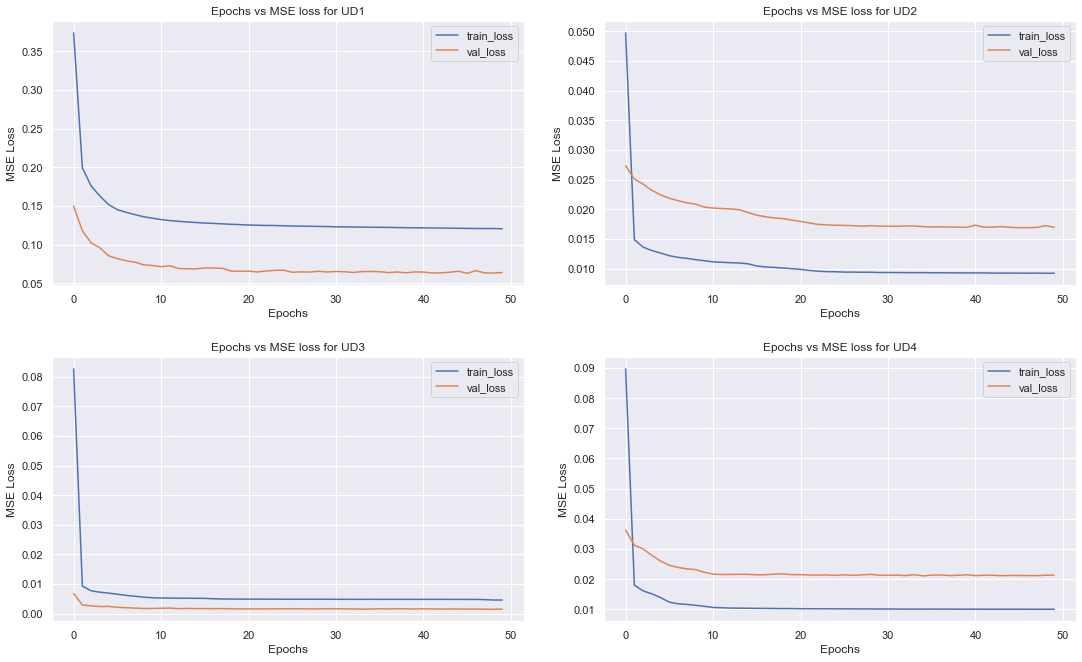

In [280]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(historyUD1.history['loss'])
axis[0, 0].plot(historyUD1.history['val_loss'])
axis[0, 0].set_title("Epochs vs MSE loss for UD1")
axis[0, 0].set_xlabel('Epochs')
axis[0, 0].set_ylabel('MSE Loss')
axis[0, 0].legend(['train_loss', 'val_loss'])
  
# For UD2
axis[0, 1].plot(historyUD2.history['loss'])
axis[0, 1].plot(historyUD2.history['val_loss'])
axis[0, 1].set_title("Epochs vs MSE loss for UD2")
axis[0, 1].set_xlabel('Epochs')
axis[0, 1].set_ylabel('MSE Loss')
axis[0, 1].legend(['train_loss', 'val_loss'])
  
# For UD3
axis[1, 0].plot(historyUD3.history['loss'])
axis[1, 0].plot(historyUD3.history['val_loss'])
axis[1, 0].set_title("Epochs vs MSE loss for UD3")
axis[1, 0].set_xlabel('Epochs')
axis[1, 0].set_ylabel('MSE Loss')
axis[1, 0].legend(['train_loss', 'val_loss'])
  
# For UD4
axis[1, 1].plot(historyUD4.history['loss'])
axis[1, 1].plot(historyUD4.history['val_loss'])
axis[1, 1].set_title("Epochs vs MSE loss for UD4")
axis[1, 1].set_xlabel('Epochs')
axis[1, 1].set_ylabel('MSE Loss')
axis[1, 1].legend(['train_loss', 'val_loss'])

# Combine all the operations and display
plt.show()


From the 4 plots, we can notice that both the training and validation loss start decreasing as the number of epochs increases but at some point, the training and validation loss became stable (no improvement). Therefore, we can say that the early stop can be between 10 and 20 epochs.

## Detecting anomalies

### Evaluate the training set without anomalies

To measure the error that occurs when reconstructing an original input, we use the Mean Absolute Error (MAE).

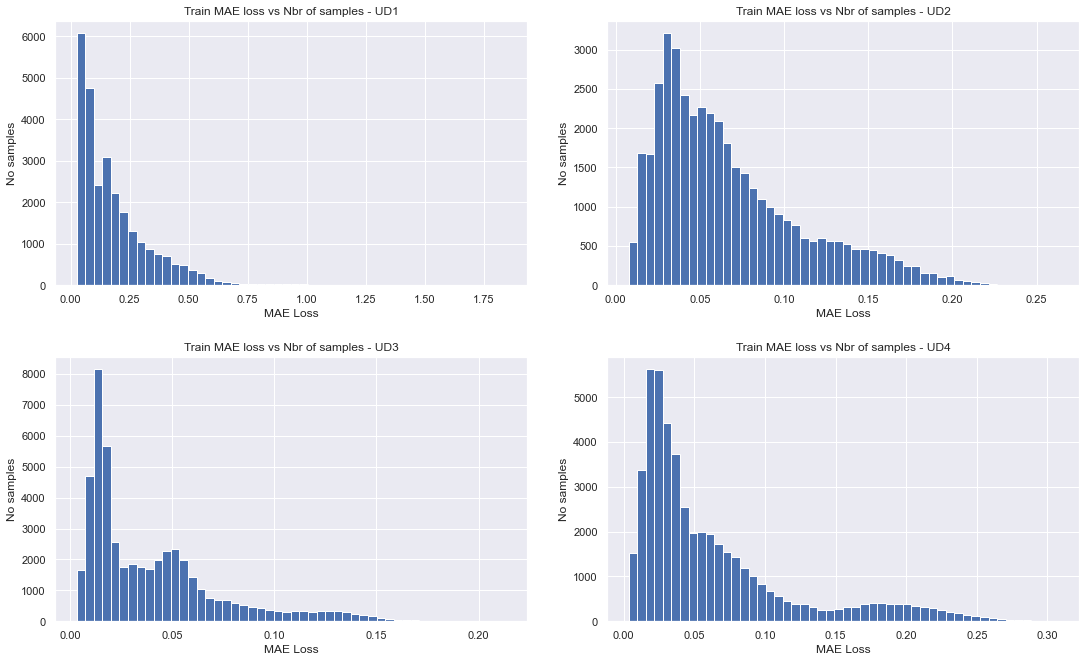

In [281]:
x_train_pred_UD1 = modelUD1.predict(x_train_UD1)
# Get train MAE loss of UD1
train_mae_loss_UD1 = np.mean(np.abs(x_train_pred_UD1 - x_train_UD1), axis=1)

x_train_pred_UD2 = modelUD2.predict(x_train_UD2)
# Get train MAE loss of UD2
train_mae_loss_UD2 = np.mean(np.abs(x_train_pred_UD2 - x_train_UD2), axis=1)

x_train_pred_UD3 = modelUD3.predict(x_train_UD3)
# Get train MAE loss of UD3
train_mae_loss_UD3 = np.mean(np.abs(x_train_pred_UD3 - x_train_UD3), axis=1)

x_train_pred_UD4 = modelUD4.predict(x_train_UD4)
# Get train MAE loss of UD4
train_mae_loss_UD4 = np.mean(np.abs(x_train_pred_UD4 - x_train_UD4), axis=1)


figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].hist(train_mae_loss_UD1, bins=50)
axis[0, 0].set_title("Train MAE loss vs Nbr of samples - UD1")
axis[0, 0].set_xlabel('MAE Loss')
axis[0, 0].set_ylabel('No samples')
  
# For UD2
axis[0, 1].hist(train_mae_loss_UD2, bins=50)
axis[0, 1].set_title("Train MAE loss vs Nbr of samples - UD2")
axis[0, 1].set_xlabel('MAE Loss')
axis[0, 1].set_ylabel('No samples')

  
# For UD3
axis[1, 0].hist(train_mae_loss_UD3, bins=50)
axis[1, 0].set_title("Train MAE loss vs Nbr of samples - UD3")
axis[1, 0].set_xlabel('MAE Loss')
axis[1, 0].set_ylabel('No samples')
  
# For UD4
axis[1, 1].hist(train_mae_loss_UD4, bins=50)
axis[1, 1].set_title("Train MAE loss vs Nbr of samples - UD4")
axis[1, 1].set_xlabel('MAE Loss')
axis[1, 1].set_ylabel('No samples')

# Combine all the operations and display
plt.show()


We can say that the difference between the original and the reconstructed input (MAE loss) yields the following results:
- for UD1, the majority of samples have MAE below 0.5
- for UD2, the majority of samples have MAE below 0.2
- for UD3, the majority of samples have MAE below 0.15
- for UD4, the majority of samples have MAE below 0.25

Another visualization of MAE loss values with respect to timestamps (time).

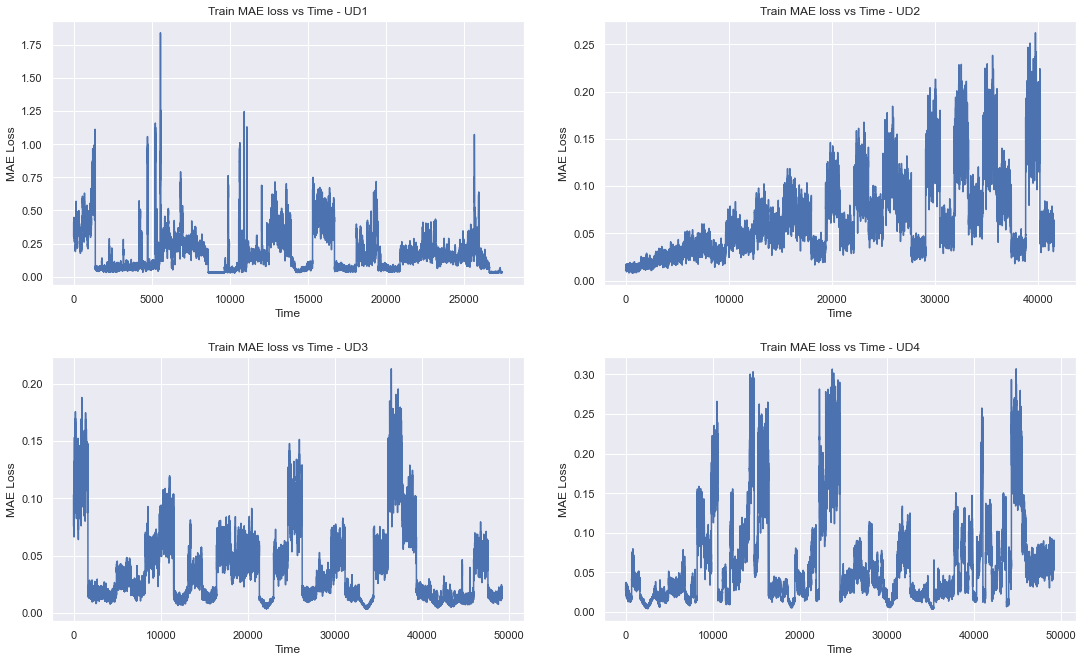

In [282]:
# plot Time vs MAE loss

figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(train_mae_loss_UD1)
axis[0, 0].set_title("Train MAE loss vs Time - UD1")
axis[0, 0].set_xlabel('Time')
axis[0, 0].set_ylabel('MAE Loss')
  
# For UD2
axis[0, 1].plot(train_mae_loss_UD2)
axis[0, 1].set_title("Train MAE loss vs Time - UD2")
axis[0, 1].set_xlabel('Time')
axis[0, 1].set_ylabel('MAE Loss')

  
# For UD3
axis[1, 0].plot(train_mae_loss_UD3)
axis[1, 0].set_title("Train MAE loss vs Time - UD3")
axis[1, 0].set_xlabel('Time')
axis[1, 0].set_ylabel('MAE Loss')
  
# For UD4
axis[1, 1].plot(train_mae_loss_UD4)
axis[1, 1].set_title("Train MAE loss vs Time - UD4")
axis[1, 1].set_xlabel('Time')
axis[1, 1].set_ylabel('MAE Loss')

# Combine all the operations and display
plt.show()


Here we see how our model has recontructed the first 32 timestamps of the first time series.

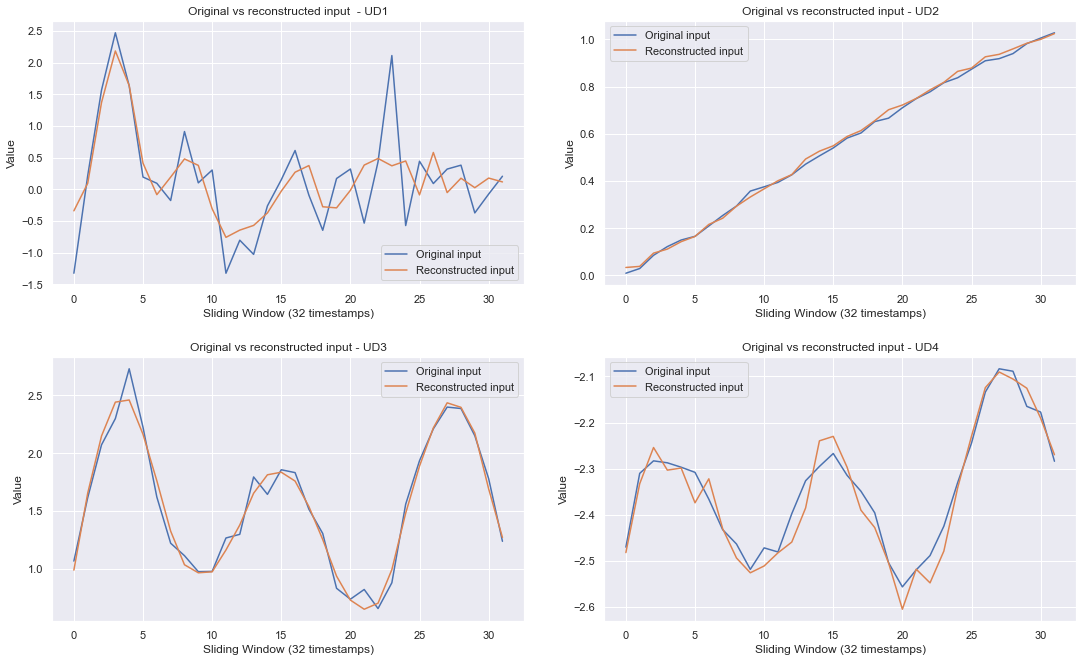

In [283]:
# Checking how the first sequence is learnt
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(x_train_UD1[0])
axis[0, 0].plot(x_train_pred_UD1[0])
axis[0, 0].set_title("Original vs reconstructed input  - UD1")
axis[0, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 0].set_ylabel('Value')
axis[0, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD2
axis[0, 1].plot(x_train_UD2[0])
axis[0, 1].plot(x_train_pred_UD2[0])
axis[0, 1].set_title("Original vs reconstructed input - UD2")
axis[0, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 1].set_ylabel('Value')
axis[0, 1].legend(['Original input', 'Reconstructed input'])
  
# For UD3
axis[1, 0].plot(x_train_UD3[0])
axis[1, 0].plot(x_train_pred_UD3[0])
axis[1, 0].set_title("Original vs reconstructed input - UD3")
axis[1, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 0].set_ylabel('Value')
axis[1, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD4
axis[1, 1].plot(x_train_UD4[0])
axis[1, 1].plot(x_train_pred_UD4[0])
axis[1, 1].set_title("Original vs reconstructed input - UD4")
axis[1, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 1].set_ylabel('Value')
axis[1, 1].legend(['Original input', 'Reconstructed input'])

# Combine all the operations and display
plt.show()


We can notice that our four models (autoencoders) could generate an output that can be considered as the reconstructed input (there is a resemblance with the original input).

### Evaluate the training set with anomalies

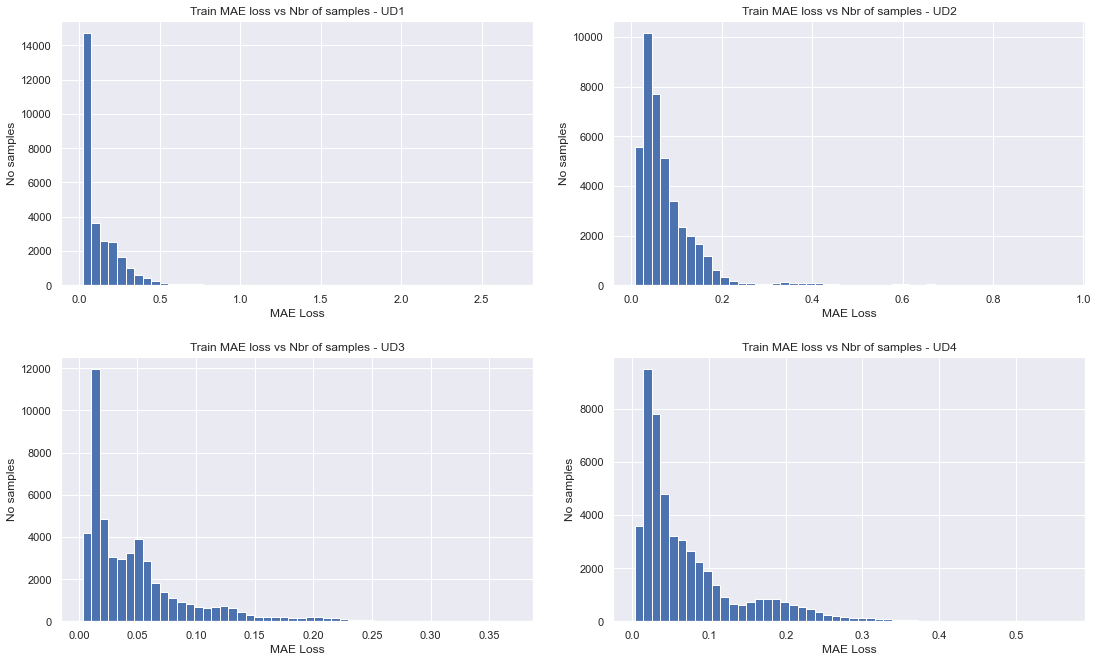

In [284]:
x_train_pred_UD1 = modelUD1.predict(x_train_noise_UD1)
# Get train MAE loss of UD1
train_mae_loss_UD1 = np.mean(np.abs(x_train_pred_UD1 - x_train_noise_UD1), axis=1)

x_train_pred_UD2 = modelUD2.predict(x_train_noise_UD2)
# Get train MAE loss of UD2
train_mae_loss_UD2 = np.mean(np.abs(x_train_pred_UD2 - x_train_noise_UD2), axis=1)

x_train_pred_UD3 = modelUD3.predict(x_train_noise_UD3)
# Get train MAE loss of UD3
train_mae_loss_UD3 = np.mean(np.abs(x_train_pred_UD3 - x_train_noise_UD3), axis=1)

x_train_pred_UD4 = modelUD4.predict(x_train_noise_UD4)
# Get train MAE loss of UD4
train_mae_loss_UD4 = np.mean(np.abs(x_train_pred_UD4 - x_train_noise_UD4), axis=1)


figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].hist(train_mae_loss_UD1, bins=50)
axis[0, 0].set_title("Train MAE loss vs Nbr of samples - UD1")
axis[0, 0].set_xlabel('MAE Loss')
axis[0, 0].set_ylabel('No samples')
  
# For UD2
axis[0, 1].hist(train_mae_loss_UD2, bins=50)
axis[0, 1].set_title("Train MAE loss vs Nbr of samples - UD2")
axis[0, 1].set_xlabel('MAE Loss')
axis[0, 1].set_ylabel('No samples')

  
# For UD3
axis[1, 0].hist(train_mae_loss_UD3, bins=50)
axis[1, 0].set_title("Train MAE loss vs Nbr of samples - UD3")
axis[1, 0].set_xlabel('MAE Loss')
axis[1, 0].set_ylabel('No samples')
  
# For UD4
axis[1, 1].hist(train_mae_loss_UD4, bins=50)
axis[1, 1].set_title("Train MAE loss vs Nbr of samples - UD4")
axis[1, 1].set_xlabel('MAE Loss')
axis[1, 1].set_ylabel('No samples')

# Combine all the operations and display
plt.show()


We can resume the plots with the following results:
- for UD1, the majority of samples have MAE below 0.5
- for UD2, the majority of samples have MAE below 0.2
- for UD3, the majority of samples have MAE below 0.15
- for UD4, the majority of samples have MAE below 0.25  
We can notice that there is an increase in the MAE loss values with some samples (samples above the thresholds mentioned earlier). Therefore, we can consider some of them as anomalies.

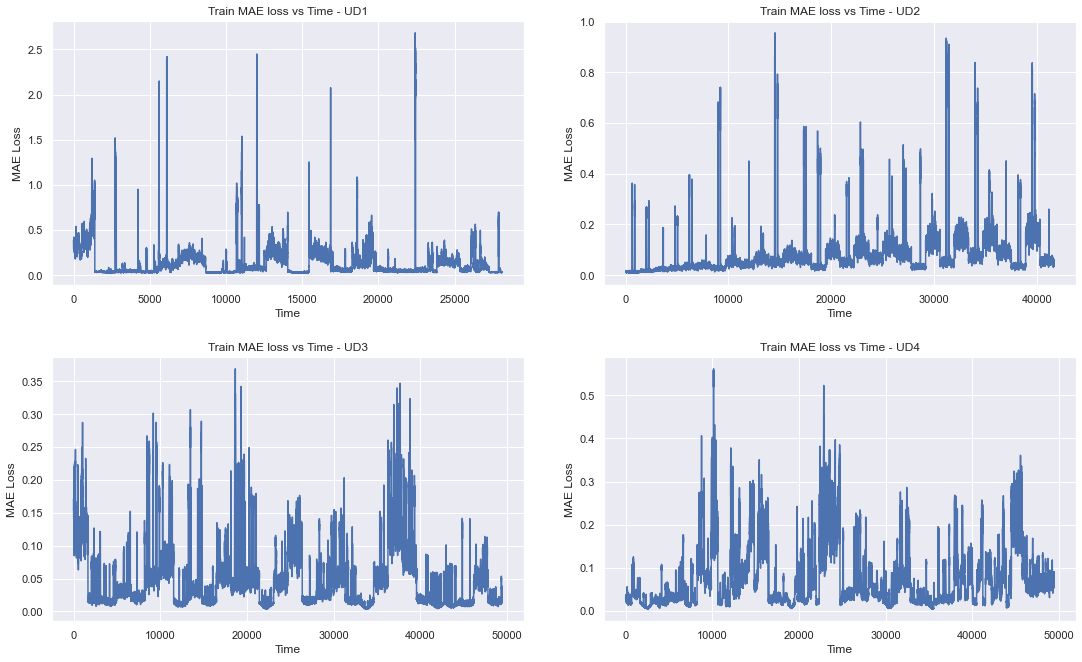

In [285]:
# plot Time vs MAE loss

figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(train_mae_loss_UD1)
axis[0, 0].set_title("Train MAE loss vs Time - UD1")
axis[0, 0].set_xlabel('Time')
axis[0, 0].set_ylabel('MAE Loss')
  
# For UD2
axis[0, 1].plot(train_mae_loss_UD2)
axis[0, 1].set_title("Train MAE loss vs Time - UD2")
axis[0, 1].set_xlabel('Time')
axis[0, 1].set_ylabel('MAE Loss')

  
# For UD3
axis[1, 0].plot(train_mae_loss_UD3)
axis[1, 0].set_title("Train MAE loss vs Time - UD3")
axis[1, 0].set_xlabel('Time')
axis[1, 0].set_ylabel('MAE Loss')
  
# For UD4
axis[1, 1].plot(train_mae_loss_UD4)
axis[1, 1].set_title("Train MAE loss vs Time - UD4")
axis[1, 1].set_xlabel('Time')
axis[1, 1].set_ylabel('MAE Loss')

# Combine all the operations and display
plt.show()


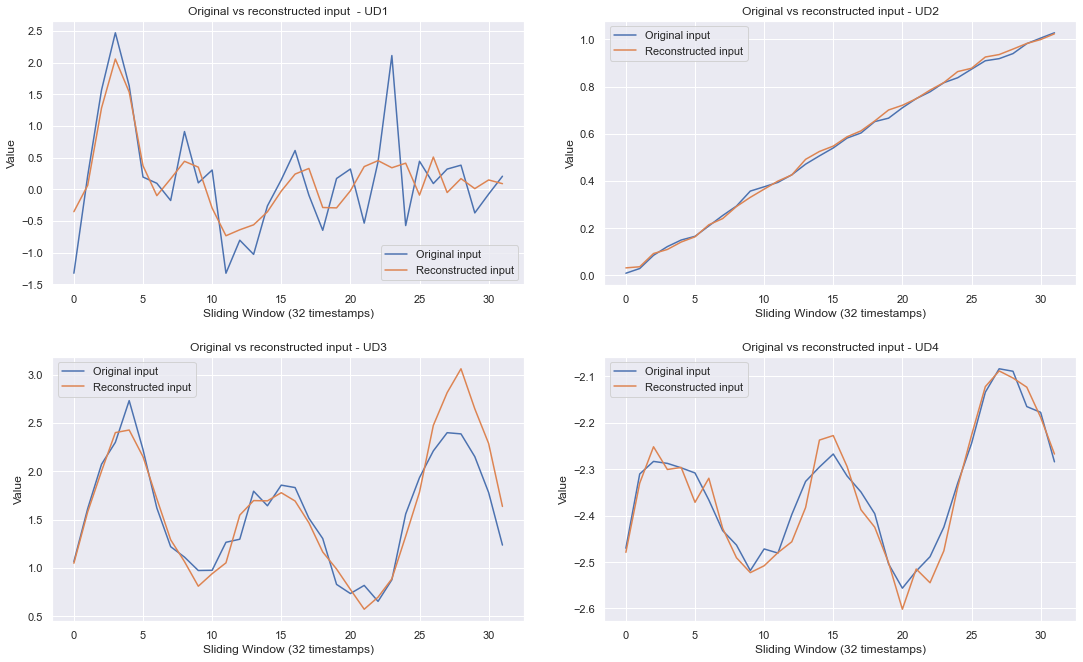

In [286]:
# Checking how the first sequence is learnt
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(x_train_UD1[0])
axis[0, 0].plot(x_train_pred_UD1[0])
axis[0, 0].set_title("Original vs reconstructed input  - UD1")
axis[0, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 0].set_ylabel('Value')
axis[0, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD2
axis[0, 1].plot(x_train_UD2[0])
axis[0, 1].plot(x_train_pred_UD2[0])
axis[0, 1].set_title("Original vs reconstructed input - UD2")
axis[0, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 1].set_ylabel('Value')
axis[0, 1].legend(['Original input', 'Reconstructed input'])
  
# For UD3
axis[1, 0].plot(x_train_UD3[0])
axis[1, 0].plot(x_train_pred_UD3[0])
axis[1, 0].set_title("Original vs reconstructed input - UD3")
axis[1, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 0].set_ylabel('Value')
axis[1, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD4
axis[1, 1].plot(x_train_UD4[0])
axis[1, 1].plot(x_train_pred_UD4[0])
axis[1, 1].set_title("Original vs reconstructed input - UD4")
axis[1, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 1].set_ylabel('Value')
axis[1, 1].legend(['Original input', 'Reconstructed input'])

# Combine all the operations and display
plt.show()


In UD3, there is an anomaly at the end of the sliding window. We notice that the reconstructed input did not match well the original input in that part because the model trained only on the normal data. Therefore, we consider that pick or that difference between the original and the reconstructed point as an anomaly.

### Evaluate the test set

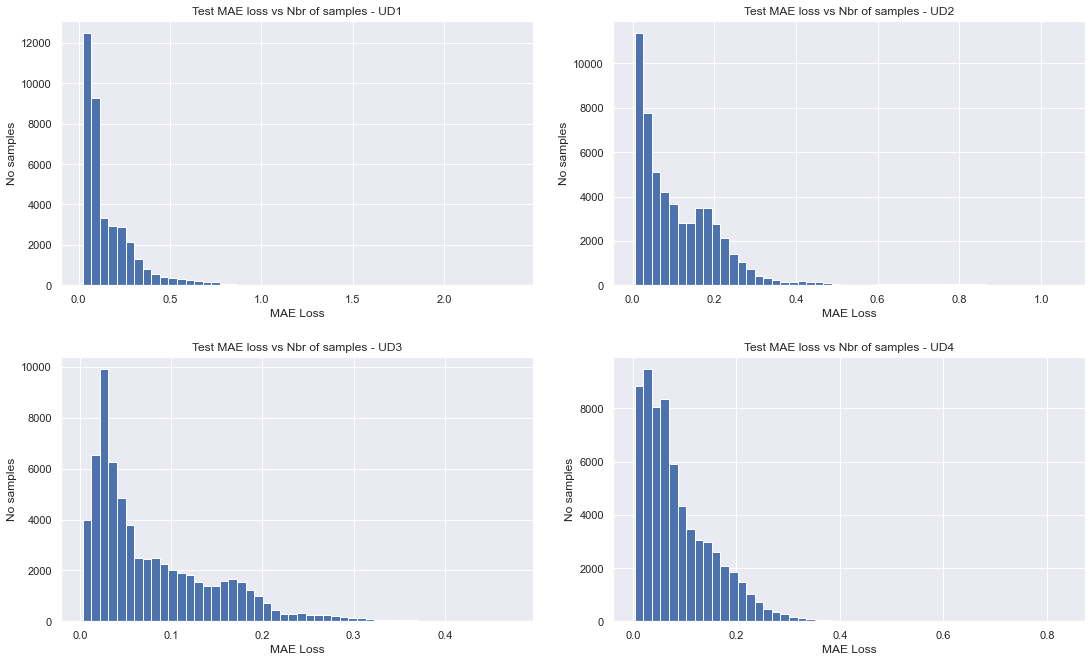

In [287]:
x_test_UD1 = x_test_UD1.reshape((-1,32))
x_test_UD2 = x_test_UD2.reshape((-1,32))
x_test_UD3 = x_test_UD3.reshape((-1,32))
x_test_UD4 = x_test_UD4.reshape((-1,32))



x_test_pred_UD1 = modelUD1.predict(x_test_UD1)
# Get test MAE loss of UD1
test_mae_loss_UD1 = np.mean(np.abs(x_test_pred_UD1 - x_test_UD1), axis=1)

x_test_pred_UD2 = modelUD2.predict(x_test_UD2)
# Get test MAE loss of UD2
test_mae_loss_UD2 = np.mean(np.abs(x_test_pred_UD2 - x_test_UD2), axis=1)

x_test_pred_UD3 = modelUD3.predict(x_test_UD3)
# Get test MAE loss of UD3
test_mae_loss_UD3 = np.mean(np.abs(x_test_pred_UD3 - x_test_UD3), axis=1)

x_test_pred_UD4 = modelUD4.predict(x_test_UD4)
# Get test MAE loss of UD4
test_mae_loss_UD4 = np.mean(np.abs(x_test_pred_UD4 - x_test_UD4), axis=1)


figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].hist(test_mae_loss_UD1, bins=50)
axis[0, 0].set_title("Test MAE loss vs Nbr of samples - UD1")
axis[0, 0].set_xlabel('MAE Loss')
axis[0, 0].set_ylabel('No samples')
  
# For UD2
axis[0, 1].hist(test_mae_loss_UD2, bins=50)
axis[0, 1].set_title("Test MAE loss vs Nbr of samples - UD2")
axis[0, 1].set_xlabel('MAE Loss')
axis[0, 1].set_ylabel('No samples')

  
# For UD3
axis[1, 0].hist(test_mae_loss_UD3, bins=50)
axis[1, 0].set_title("Test MAE loss vs Nbr of samples - UD3")
axis[1, 0].set_xlabel('MAE Loss')
axis[1, 0].set_ylabel('No samples')
  
# For UD4
axis[1, 1].hist(test_mae_loss_UD4, bins=50)
axis[1, 1].set_title("Test MAE loss vs Nbr of samples - UD4")
axis[1, 1].set_xlabel('MAE Loss')
axis[1, 1].set_ylabel('No samples')

# Combine all the operations and display
plt.show()


We can resume the plots with the following results:
- for UD1, the majority of samples have MAE below 0.5
- for UD2, the majority of samples have MAE below 0.3. Increased from 0.2 (with training set with and without anomalies) to 0.3
- for UD3, the majority of samples have MAE below 0.2. Increased from 0.15 to 0.2
- for UD4, the majority of samples have MAE below 0.25  
We can notice that there is an increase in the MAE loss values with some samples (samples above the thresholds mentioned earlier). Therefore, we can consider some of them as anomalies.

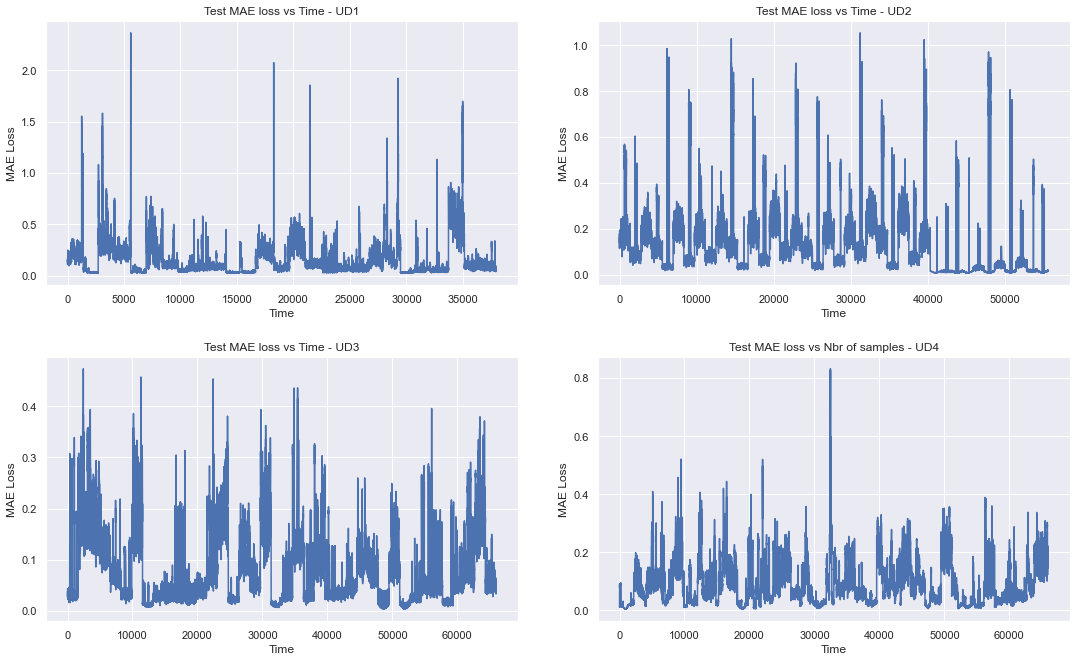

In [288]:
# plot Time vs MAE loss

figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(test_mae_loss_UD1)
axis[0, 0].set_title("Test MAE loss vs Time - UD1")
axis[0, 0].set_xlabel('Time')
axis[0, 0].set_ylabel('MAE Loss')
  
# For UD2
axis[0, 1].plot(test_mae_loss_UD2)
axis[0, 1].set_title("Test MAE loss vs Time - UD2")
axis[0, 1].set_xlabel('Time')
axis[0, 1].set_ylabel('MAE Loss')

  
# For UD3
axis[1, 0].plot(test_mae_loss_UD3)
axis[1, 0].set_title("Test MAE loss vs Time - UD3")
axis[1, 0].set_xlabel('Time')
axis[1, 0].set_ylabel('MAE Loss')
  
# For UD4
axis[1, 1].plot(test_mae_loss_UD4)
axis[1, 1].set_title("Test MAE loss vs Nbr of samples - UD4")
axis[1, 1].set_xlabel('Time')
axis[1, 1].set_ylabel('MAE Loss')

# Combine all the operations and display
plt.show()


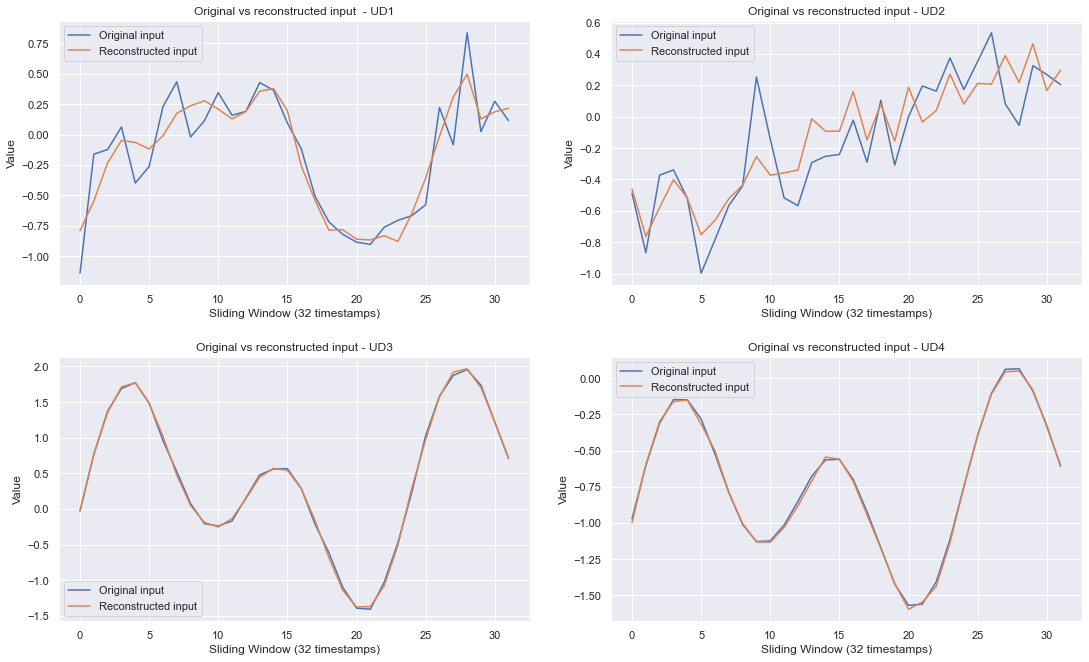

In [289]:
# Checking how the first sequence is learnt
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(x_test_UD1[0])
axis[0, 0].plot(x_test_pred_UD1[0])
axis[0, 0].set_title("Original vs reconstructed input  - UD1")
axis[0, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 0].set_ylabel('Value')
axis[0, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD2
axis[0, 1].plot(x_test_UD2[0])
axis[0, 1].plot(x_test_pred_UD2[0])
axis[0, 1].set_title("Original vs reconstructed input - UD2")
axis[0, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 1].set_ylabel('Value')
axis[0, 1].legend(['Original input', 'Reconstructed input'])
  
# For UD3
axis[1, 0].plot(x_test_UD3[0])
axis[1, 0].plot(x_test_pred_UD3[0])
axis[1, 0].set_title("Original vs reconstructed input - UD3")
axis[1, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 0].set_ylabel('Value')
axis[1, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD4
axis[1, 1].plot(x_test_UD4[0])
axis[1, 1].plot(x_test_pred_UD4[0])
axis[1, 1].set_title("Original vs reconstructed input - UD4")
axis[1, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 1].set_ylabel('Value')
axis[1, 1].legend(['Original input', 'Reconstructed input'])

# Combine all the operations and display
plt.show()


## ROC and AUC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate on y axis and False Positive Rate on x axis.  
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

To calculate the ROC and the AUC score, we need first to define the set of thresholds that we are going to use.
From the plot "Time vs Test MAE loss", we identify the possible values of a threshold between 0 and 0.6.

In [290]:
Thresholds = np.arange(0, 0.6, 0.02)

We compare the reconstructed input with the original one. If the threshold is higher than the reconstructed input, we label the sample as a 0, and with 1 on the contrary. After that, we calculate the true positive rate(TPR) and the false positive rate(FPR) for each threshold.

In [291]:
def true_false_positive(test_pred_labels, test_labels):
    true_positive = np.equal(test_pred_labels, 1) & np.equal(test_labels, 1)
    true_negative = np.equal(test_pred_labels, 0) & np.equal(test_labels, 0)
    false_positive = np.equal(test_pred_labels, 1) & np.equal(test_labels, 0)
    false_negative = np.equal(test_pred_labels, 0) & np.equal(test_labels, 1)

    tpr = round(true_positive.sum() / (true_positive.sum() + false_negative.sum()),2)
    fpr = round(false_positive.sum() / (false_positive.sum() + true_negative.sum()),2)

    return tpr, fpr

In [292]:
from sklearn.metrics import roc_auc_score
ROC_UD1 = []
AUC_UD1 = []
test_labels_UD1 = np.array(UD1_labels)

ROC_UD2 = []
AUC_UD2 = []
test_labels_UD2 = np.array(UD2_labels)

ROC_UD3 = []
AUC_UD3 = []
test_labels_UD3 = np.array(UD3_labels)

ROC_UD4 = []
AUC_UD4 = []
test_labels_UD4 = np.array(UD4_labels)

for c in range(0,4):
    
    for i in range(len(Thresholds)):
            if c == 0:
                test_pred_labels = np.greater_equal(test_mae_loss_UD1, Thresholds[i]).astype(int)
                tpr, fpr = true_false_positive(test_pred_labels, test_labels_UD1)
                ROC_UD1 = np.append(ROC_UD1, [fpr, tpr])
                auc_value = round(roc_auc_score(test_labels_UD1,test_pred_labels),2)
                AUC_UD1.append(auc_value)
                str = f"AUC UD1 with the threshold {Thresholds[i]} is {auc_value} with TPR = {tpr} and FPR = {fpr}"
                print(str)
            elif c == 1:
                test_pred_labels = np.greater_equal(test_mae_loss_UD2, Thresholds[i]).astype(int)
                tpr, fpr = true_false_positive(test_pred_labels, test_labels_UD2)
                ROC_UD2 = np.append(ROC_UD2, [fpr, tpr])
                auc_value = round(roc_auc_score(test_labels_UD2,test_pred_labels),2)
                AUC_UD2.append(auc_value)
                str = f"AUC UD2 with the threshold {Thresholds[i]} is {auc_value} with TPR = {tpr} and FPR = {fpr}"
                print(str)
            elif c == 2:
                test_pred_labels = np.greater_equal(test_mae_loss_UD3, Thresholds[i]).astype(int)
                tpr, fpr = true_false_positive(test_pred_labels, test_labels_UD3)
                ROC_UD3 = np.append(ROC_UD3, [fpr, tpr])
                auc_value = round(roc_auc_score(test_labels_UD3,test_pred_labels),2)
                AUC_UD3.append(auc_value)
                str = f"AUC UD3 with the threshold {Thresholds[i]} is {auc_value} with TPR = {tpr} and FPR = {fpr}"
                print(str)
            elif c == 3:
                test_pred_labels = np.greater_equal(test_mae_loss_UD4, Thresholds[i]).astype(int)
                tpr, fpr = true_false_positive(test_pred_labels, test_labels_UD4)
                ROC_UD4 = np.append(ROC_UD4, [fpr, tpr])
                auc_value = round(roc_auc_score(test_labels_UD4,test_pred_labels),2)
                AUC_UD4.append(auc_value)
                str = f"AUC UD4 with the threshold {Thresholds[i]} is {auc_value} with TPR = {tpr} and FPR = {fpr}"
                print(str)
    print("\n")

AUC UD1 with the threshold 0.0 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.02 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.04 is 0.57 with TPR = 1.0 and FPR = 0.85
AUC UD1 with the threshold 0.06 is 0.59 with TPR = 0.9 and FPR = 0.72
AUC UD1 with the threshold 0.08 is 0.65 with TPR = 0.87 and FPR = 0.58
AUC UD1 with the threshold 0.1 is 0.67 with TPR = 0.81 and FPR = 0.47
AUC UD1 with the threshold 0.12 is 0.68 with TPR = 0.75 and FPR = 0.39
AUC UD1 with the threshold 0.14 is 0.67 with TPR = 0.69 and FPR = 0.35
AUC UD1 with the threshold 0.16 is 0.66 with TPR = 0.65 and FPR = 0.32
AUC UD1 with the threshold 0.18 is 0.64 with TPR = 0.58 and FPR = 0.29
AUC UD1 with the threshold 0.2 is 0.63 with TPR = 0.52 and FPR = 0.26
AUC UD1 with the threshold 0.22 is 0.62 with TPR = 0.47 and FPR = 0.23
AUC UD1 with the threshold 0.24 is 0.63 with TPR = 0.45 and FPR = 0.19
AUC UD1 with the threshold 0.26 is 0.63 with TPR = 0.42 and FPR = 0.16
AUC UD1 with the 

We visualize the AUC_values where the threshold will be on the X axis and the AUC value will be on the Y axis

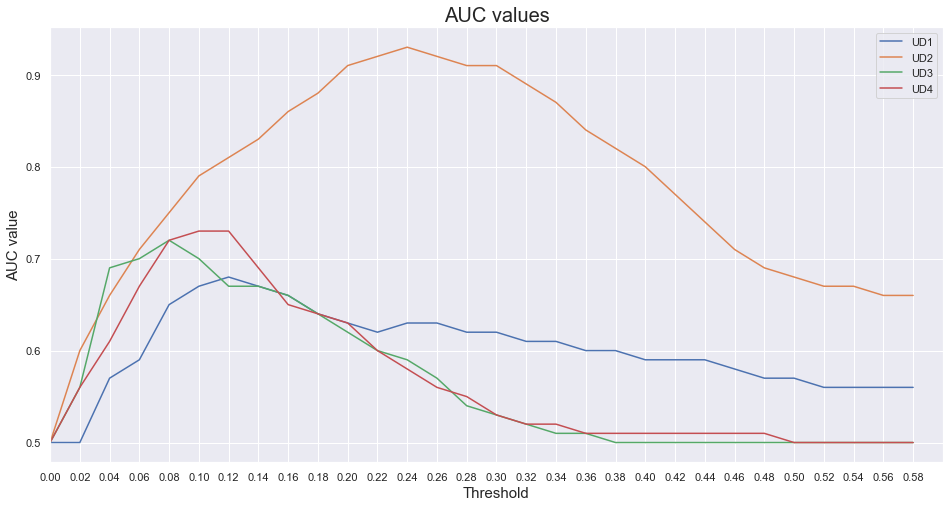

In [293]:
AUC_UD1 = np.array(AUC_UD1).reshape(-1, 1)
AUC_UD2 = np.array(AUC_UD2).reshape(-1, 1)
AUC_UD3 = np.array(AUC_UD3).reshape(-1, 1)
AUC_UD4 = np.array(AUC_UD4).reshape(-1, 1)
Thresholds = np.array(Thresholds).reshape(-1,1)

plt.figure(figsize=(16,8))
plt.plot(Thresholds,AUC_UD1)
plt.plot(Thresholds,AUC_UD2)
plt.plot(Thresholds,AUC_UD3)
plt.plot(Thresholds,AUC_UD4)
plt.xlim(0, 0.6)
plt.xticks(Thresholds)
plt.title('AUC values',fontsize=20)
plt.xlabel('Threshold',fontsize=15)
plt.ylabel('AUC value',fontsize=15)
plt.legend(["UD1","UD2","UD3","UD4"])
plt.show()

Finally, we visualize the ROC_curve where each pair of TPR and FPR represent a threshold.

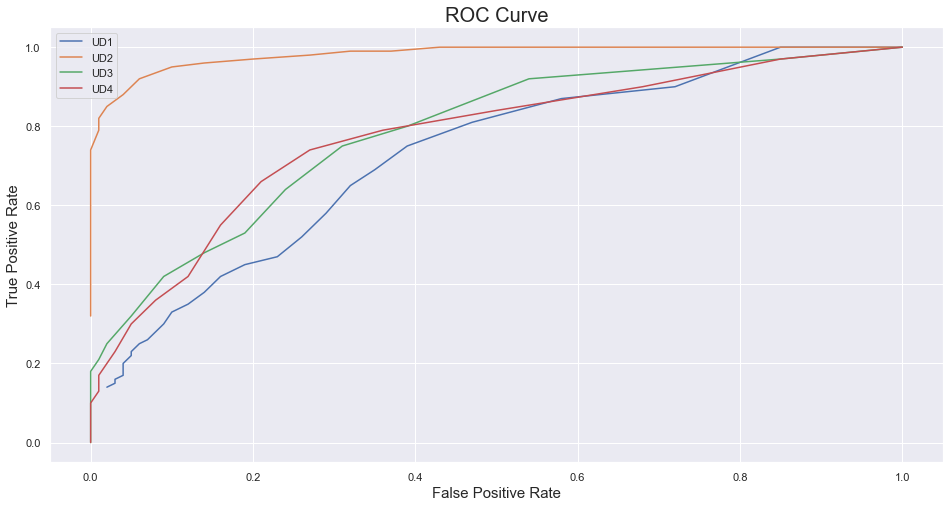

In [294]:
plt.figure(figsize=(16,8))
ROC_UD1 = ROC_UD1.reshape(-1, 2)
ROC_UD2 = ROC_UD2.reshape(-1, 2)
ROC_UD3 = ROC_UD3.reshape(-1, 2)
ROC_UD4 = ROC_UD4.reshape(-1, 2)

plt.plot(ROC_UD1[:,0],ROC_UD1[:,1])
plt.plot(ROC_UD2[:,0],ROC_UD2[:,1])
plt.plot(ROC_UD3[:,0],ROC_UD3[:,1])
plt.plot(ROC_UD4[:,0],ROC_UD4[:,1])
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.legend(["UD1","UD2","UD3","UD4"])

## Results

From the AUC and ROC curve, we conclude the following results:
- For UD1, the best AUC value is 0.68 (68%) with the threshold 0.12 where the true positive rate is 75% and the false positive rate is 39%.
- For UD2, the best AUC value is 0.93 (93%) with the threshold 0.24 where the true positive rate is 92% and the false positive rate is 6%.
- For UD3, the best AUC value is 0.72 (72%) with the threshold 0.08 where the true positive rate is 75% and the false positive rate is 31%.
- For UD4, the best AUC value is 0.73 (73%) with the threshold 0.1 where the true positive rate is 74% and the false positive rate is 27%.

The best ROC curve is the one where TPR is 1.0 and FPR is 0.0 which means an AUC value of 100%.  
We can notice that UD2 has the best curve followed by UD4 and UD3 (pretty much the same) and finally UD1. 

## Discussion

In light of the above results, we can say that the performance of the autoencoder varies with different datasets. For example, it performs well with the dataset UD2 and the inverse with the dataset UD1.  
In the following, we will provide from our point of view the reasons that lead to those results:
- **The type of the dataset**: 
    - UD1 is stationary means that the summary statistics calculated on the time series are consistent and stable plus the fact that the values do not depend on time. In addition, the anomalies are labeled by humans. Therefore, we can say that the detection of anomalies in such type of dataset is tricky as the anomalies are little hidden between the normal points which makes it difficult to detect.
    - The anomalies in UD2 have been inserted randomly; therefore representing point anomalies. It means that the detection of those points is pretty much easier as they are clear and noticeable in their surroundings (between normal points)
    - UD3 and UD4 contain seasonality which means that the values of timestamps depend on time and the summary statistics change and vary among time series, making the detection of anomalies a difficult task. The slight difference between UD3 and UD4 is the fact that UD4 contains change points anomalies, which help the autoencoder as we saw in the results to reduce the false positive rate compared to UD3.
    - Furthermore, on average, the anomalous rate of each time series of UD1 is about 1.9%. In UD2 and UD3, the rate is 0.3%. In UD4, the rate is 0.5%.
- **The size of the training set**:
    - the amount of data fed to the autoencoder made a little difference in the final results. The size of the training set of UD1 is 27.5k, whereas UD2 is 41.5k, and UD2 and UD3 are 49.5k.
- **The standardization process**:
    - I have noticed that the interval of values after standardization in UD1 is bigger than the rest datasets (at least in the first time series). Therefore, the MSE loss & MAE loss of UD1 will be bigger than the rest of the losses, which means that the definition of a suitable threshold is tricky compared to the general context (UD2, UD3, UD4).